# Практическое задание

## Задание 1

Для реализованной в методичке модели градиентного бустинга
построить графики зависимости ошибки от количества деревьев в ансамбле и
от максимальной глубины деревьев.
Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
from functools import partial

import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

from problem_1_gb import gb_fit, gb_predict
from problem_1_metrics import mse, mae, std, r2
from problem_1_plot import plot_1, plot_2

### Set parameters

In [2]:
n_trees = 50
max_depths = range(1, 6, 1)

coefs = [1] * n_trees
eta = .1

metric_funcs = [mse, mae, std, r2]

dataset_params = {'return_X_y': True}
split_params = {'test_size': .25}

### Lead and split dataset

In [3]:
X, y = load_diabetes(**dataset_params)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    **split_params
)

### Make trees

In [4]:
gb_fit_ = partial(
    gb_fit,
    n_trees=n_trees,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    coefs=coefs,
    eta=eta
)

trees_ = [gb_fit_(max_depth=max_depth)[0] for max_depth in max_depths]

### Calculate metrics

In [5]:
gb_predict_ = partial(gb_predict, eta=eta)

X_ = X_train, X_test
y_ = y_train, y_test

metrics = [
    [
        [
            [
                metric(
                    gb_predict_(X_[i], trees_[j][:k + 1], coefs[:k + 1]),
                    y_[i]
                )
                for metric in metric_funcs
            ]
            for k in range(len(trees_[j]))
        ]
        for j in range(len(max_depths))
    ]
    for i in range(len(y_))
]

metrics = np.array(metrics)

### Plot metrics depending on number of trees

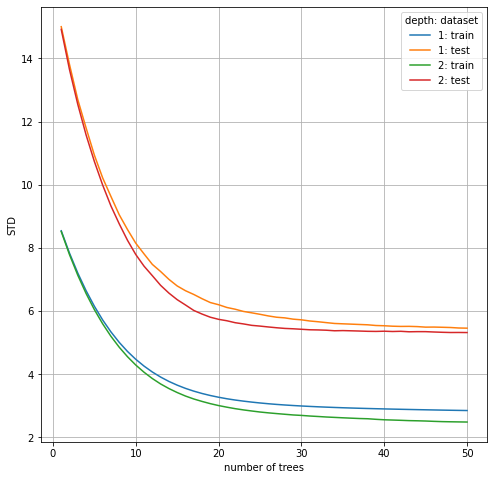

In [6]:
depths = 1, 2

tree_indexes=range(n_trees)
depth_indexes=[max_depths.index(depth) for  depth in depths]

plot_1(
    metric_index=2,
    tree_indexes=tree_indexes,
    depth_indexes=depth_indexes,
    metrics=metrics,
    number_trees=np.arange(1, n_trees + 1, dtype=int),
    max_depths=max_depths
)

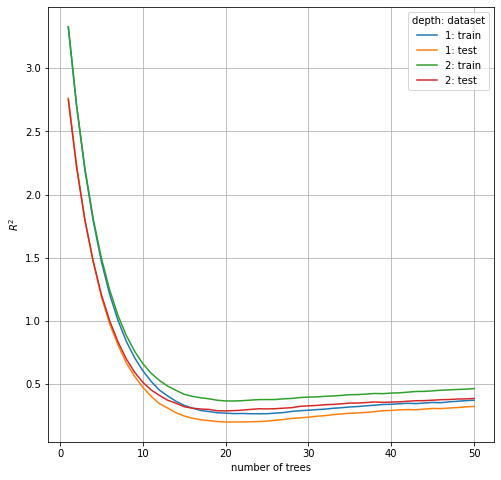

In [7]:
depths = 1, 2

tree_indexes=range(n_trees)
depth_indexes=[max_depths.index(depth) for  depth in depths]

plot_1(
    metric_index=3,
    tree_indexes=tree_indexes,
    depth_indexes=depth_indexes,
    metrics=metrics,
    number_trees=np.arange(1, n_trees + 1, dtype=int),
    max_depths=max_depths
)

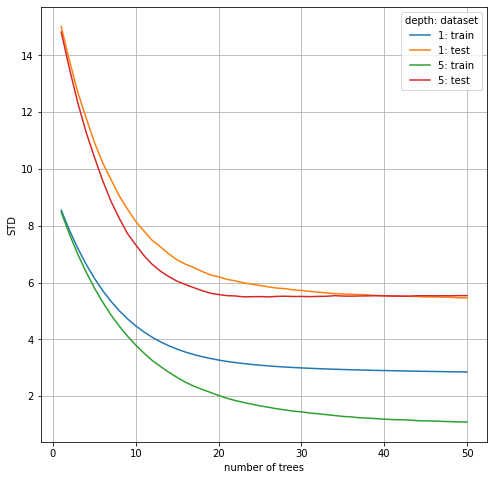

In [8]:
depths = 1, 5

tree_indexes=range(n_trees)
depth_indexes=[max_depths.index(depth) for  depth in depths]

plot_1(
    metric_index=2,
    tree_indexes=tree_indexes,
    depth_indexes=depth_indexes,
    metrics=metrics,
    number_trees=np.arange(1, n_trees + 1, dtype=int),
    max_depths=max_depths
)

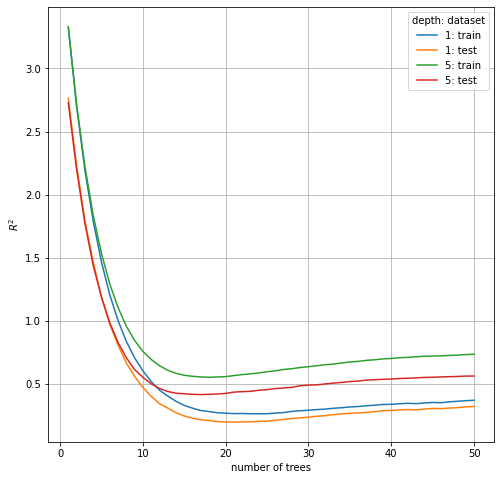

In [9]:
depths = 1, 5

tree_indexes=range(n_trees)
depth_indexes=[max_depths.index(depth) for  depth in depths]

plot_1(
    metric_index=3,
    tree_indexes=tree_indexes,
    depth_indexes=depth_indexes,
    metrics=metrics,
    number_trees=np.arange(1, n_trees + 1, dtype=int),
    max_depths=max_depths
)

### Plot metrics depending on maximum depth

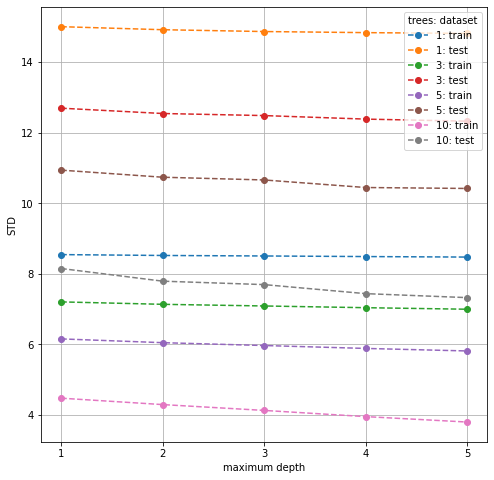

In [10]:
trees = 1, 3, 5, 10

tree_indexes = [_ - 1 for _ in trees]
depth_indexes = range(len(max_depths))

plot_2(
    metric_index=2,
    tree_indexes=tree_indexes,
    depth_indexes=depth_indexes,
    metrics=metrics,
    number_trees=np.arange(1, n_trees + 1, dtype=int),
    max_depths=np.array(max_depths)
)

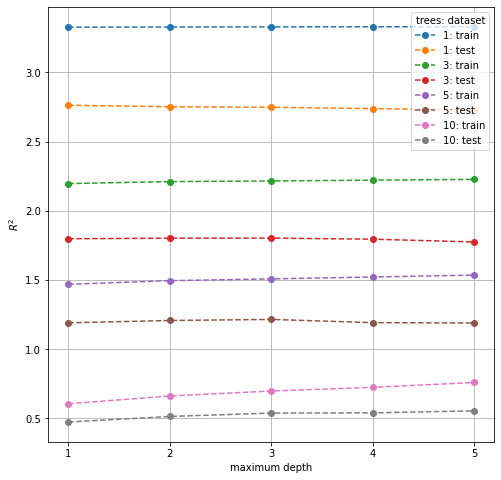

In [11]:
trees = 1, 3, 5, 10

tree_indexes = [_ - 1 for _ in trees]
depth_indexes = range(len(max_depths))

plot_2(
    metric_index=3,
    tree_indexes=tree_indexes,
    depth_indexes=depth_indexes,
    metrics=metrics,
    number_trees=np.arange(1, n_trees + 1, dtype=int),
    max_depths=np.array(max_depths)
)

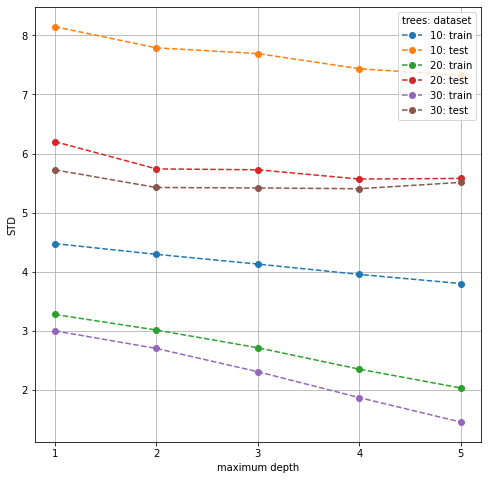

In [12]:
trees = 10, 20, 30

tree_indexes = [_ - 1 for _ in trees]
depth_indexes = range(len(max_depths))

plot_2(
    metric_index=2,
    tree_indexes=tree_indexes,
    depth_indexes=depth_indexes,
    metrics=metrics,
    number_trees=np.arange(1, n_trees + 1, dtype=int),
    max_depths=np.array(max_depths)
)

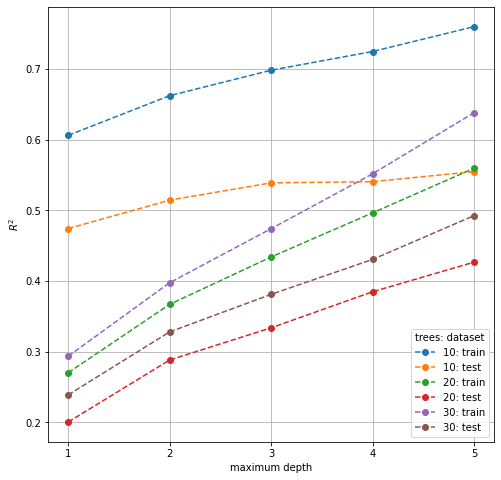

In [13]:
trees = 10, 20, 30

tree_indexes = [_ - 1 for _ in trees]
depth_indexes = range(len(max_depths))

plot_2(
    metric_index=3,
    tree_indexes=tree_indexes,
    depth_indexes=depth_indexes,
    metrics=metrics,
    number_trees=np.arange(1, n_trees + 1, dtype=int),
    max_depths=np.array(max_depths)
)